In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import os, csv,shutil
import cv2
import pandas as pd

In [40]:
src ='C:/Users/user/Desktop/SDL/Project/2D to 3D/reference image/'
files = os.listdir(src)

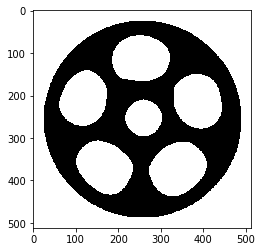

In [41]:
for file in files:
    org_img = cv2.imread(src+file, cv2.IMREAD_GRAYSCALE)
    resize_img = cv2.resize(org_img,(512,512))
    blur = cv2.medianBlur(resize_img,13)
    blur = cv2.GaussianBlur(blur,(7,7),0)
    blur = cv2.GaussianBlur(blur,(13,13),0)
    
    th,bin_img = cv2.threshold(blur,60,255, cv2.THRESH_BINARY)

    plt.imshow(bin_img,'gray')
    plt.show()
    cv2.imwrite(src+'blur_'+file,bin_img)

In [48]:
def remove_dots(x_data, y_data, pieces, rate):

    x_out = [[] for i in range(pieces)]
    y_out = [[] for i in range(pieces)]

    for i in range(pieces):
        group_size = len(x_data[i])
        for j in range(group_size):
            if group_size > 50:
                if (j%int(rate) == 0):
                    x_out[i].append(x_data[i][j])
                    y_out[i].append(y_data[i][j])
            elif group_size < 40:
                pass 
            else:
                if (j%int(rate/2) == 0):
                    x_out[i].append(x_data[i][j])
                    y_out[i].append(y_data[i][j])
        #print("remove_dots:",group_size, '->', len(x_out[i]))
    return x_out, y_out

def draw_array(x_array, y_array):
    plt.figure(figsize=(10,10), dpi = 50) 
    plt.plot(x_array, y_array,color = 'g',ms = 5, marker='o', ls=':',lw=1)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.gca().set_aspect('equal',adjustable='box')

def draw_pieces(x_array, y_array):
    plt.figure(figsize=(10,10), dpi = 50) 
    for i in range(len(x_array)):
        #plt.figure(figsize=(15,15), dpi = 50)
        plt.plot(x_array[i], y_array[i], marker='o', ms = 5,ls='--')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.gca().set_aspect('equal',adjustable='box')
    
def save_csv(x_array, y_array, pieces, name):
  with open(name,'w') as csvfile:

    fieldnames=[]
    for i in range(pieces):
      x = 'x_'+str(i)
      y = 'y_'+str(i)
      fieldnames.append(x) 
      fieldnames.append(y)  

    writer= csv.DictWriter(csvfile,fieldnames= fieldnames)
    writer.writeheader()

    for i in range(pieces):
      for j in range(len(x_array[i])):   
        writer.writerow({ fieldnames[2*i]: x_array[i][j], fieldnames[2*i+1]: y_array[i][j]})
    
def distance(x1,y1,x2,y2):
    a = x2-x1
    b = y2-y1
    c= math.sqrt((a*a)+(b*b))
    return c

def find_near(x_array,y_array,x,y, min_d):

    for i in range(len(x_array)):
        x_=x_array[i]
        y_=y_array[i]
        d = distance(x_,y_,x,y)
      
        if (d < min_d and d > 0):

            x_near = x_array[i]
            y_near = y_array[i]
            idx = i
            min_d = d  

    return x_near, y_near, idx 

def sort_array(x_array, y_array, del_n, group_d, min_d):
    # 임시 list 생성
    x_tmp = []
    y_tmp = []

    for i in range(len(x_array)):
        x_tmp.append(x_array[i])
        y_tmp.append(y_array[i])

    # output list 생성
    x_out = []
    y_out = []

    # 현재 x, y 값 설정(initial point)
    x = x_tmp[0]
    y = y_tmp[0]

    # output 첫번째 열 생성
    x_out.append([])
    y_out.append([])

    row = 0

    # output 첫번째 열에 첫번째 값 저장
    x_out[row].append(x)
    y_out[row].append(y)

    # 임시 list에 첫번째 값 제거
    del x_tmp[0]
    del y_tmp[0]
    for i in range(len(x_array)-1):
        #print(i)
        # output list에 nearest 값 저장 
        x_, y_ = x, y
        x, y, idx = find_near(x_tmp,y_tmp,x_,y_, min_d)
        d = distance(x,y,x_,y_)
        #print(d)
        if (d>group_d):

            if (len(x_out[row])<del_n): 
                del x_out[row]
                del y_out[row]
                #print('del', row)
                x_out.append([])
                y_out.append([])    

            else:
                x_out.append([])
                y_out.append([])

                #print('accept', row)
                row = row+1

        x_out[row].append(x)
        y_out[row].append(y)

        # 임시 list에 nearest 값 제거     
        del x_tmp[idx]
        del y_tmp[idx]

    if (len(x_out[row])<del_n): 
        del x_out[row]
        del y_out[row]
        #print('del', row)

    plt.figure(figsize=(15,15), dpi = 40) 

    draw_pieces(x_out, y_out)
  
    return x_out, y_out, len(x_out)

blur_blur_3Binary_35_draw.csv
pieces: 5 ==> pieces2: 5


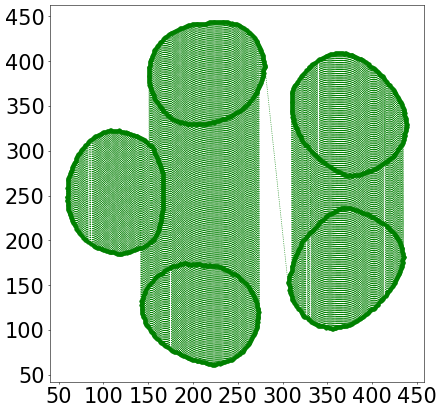

<Figure size 600x600 with 0 Axes>

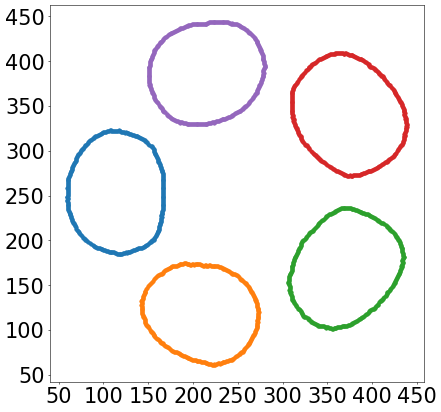

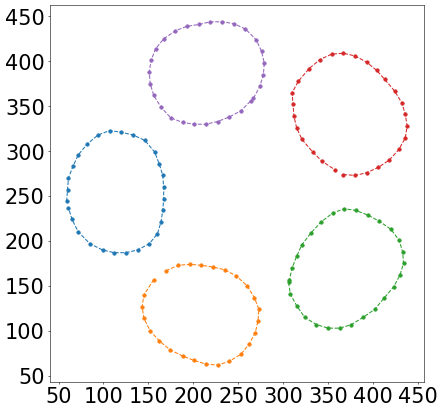

In [49]:
src2 = src.split('/reference image/')[0]+'/reference_csv/'
files = os.listdir(src2)

for file in files:
    print(file)
    data = pd.read_csv(src2+file,sep='_',names=['x','y'])
    x_origin, y_origin = data['x'].values, data['y'].values
    draw_array(x_origin, y_origin)
    
    x_out, y_out, pieces = sort_array(x_origin,y_origin,10,10,800) # del_n 은 15 보다 작은 리스트는 삭제 
    x_result, y_result = remove_dots(x_out, y_out, pieces,13)
    draw_pieces(x_result, y_result)
    
    x_result2,y_result2=[],[]
    for n in range(len(x_result)):
        if len(x_result[n])>2:
            x_result2.append(x_result[n])
            y_result2.append(y_result[n])
    
    pieces2 = len(x_result2)
    
    print('pieces:',pieces,'==>','pieces2:',pieces2)
    
    save_csv(x_result2, y_result2, pieces2, src2+'sorted_'+file)